# <center> Clustering And Classification Of Seven Types Beans </center>

#### *Student no : 21627485* 
####  *Student name : Mustafa Kollu* 

## Table of Content

[Purpose](#purpose)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling for Clustering](#clusteringmodel)  
[Clustering results](#clustering)    
[Modeling for Classification](#classificationmodel)  
[Evaluation](#evaluation)  
[References](#references)   


## Purpose <a class="anchor" id="purpose"></a>

The aim of this project is to identify the types of beans using machine learning methods from the features created by digitizing various beans images. In this project, we will use two different machine learning methods. These are supervised learning and unsupervised learning. With these methods, it is to cluster and classify the data according to their types (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira).

## Data Understanding<a class="anchor" id="data_understanding"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

Firstly, We import the libraries we need to prepare our data.

In [2]:
OD = pd.read_csv('data.csv')

We are reading the chunk of data given in the form of a csv file.

In [3]:
OD.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [4]:
OD.tail()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653247  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON

We examine the first 5 lines and the last 5 lines of the data.

In [5]:
OD.shape

(13611, 17)

In [6]:
OD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

We see that the data consists of 13611 rows and 17 columns, excluding null. We find that all of our features are numeric but our label is an object.

In [7]:
OD.describe(include="all")

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count    13611.000000  13611.000000     13611.000000     13611.000000   
unique            NaN           NaN              NaN              NaN   
top               NaN           NaN              NaN              NaN   
freq              NaN           NaN              NaN              NaN   
mean     53048.284549    855.283459       320.141867       202.270714   
std      29324.095717    214.289696        85.694186        44.970091   
min      20420.000000    524.736000       183.601165       122.512653   
25%      36328.000000    703.523500       253.303633       175.848170   
50%      44652.000000    794.941000       296.883367       192.431733   
75%      61332.000000    977.213000       376.495012       217.031741   
max     254616.000000   1985.370000       738.860154       460.198497   

        AspectRation  Eccentricity     ConvexArea  EquivDiameter  \
count   13611.000000  13611.000000   13611.000000   13611.000000   
unique           NaN           NaN            NaN            NaN   
top              NaN           NaN            NaN            NaN   
freq             NaN           NaN            NaN            NaN   
mean        1.583242      0.750895   53768.200206     253.064220   
std         0.246678      0.092002   29774.915817      59.177120   
min         1.024868      0.218951   20684.000000     161.243764   
25%         1.432307      0.715928   36714.500000     215.068003   
50%         1.551124      0.764441   45178.000000     238.438026   
75%         1.707109      0.810466   62294.000000     279.446467   
max         2.430306      0.911423  263261.000000     569.374358   

              Extent      Solidity     roundness   Compactness  ShapeFactor1  \
count   13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.749733      0.987143      0.873282      0.799864      0.006564   
std         0.049086      0.004660      0.059520      0.061713      0.001128   
min         0.555315      0.919246      0.489618      0.640577      0.002778   
25%         0.718634      0.985670      0.832096      0.762469      0.005900   
50%         0.759859      0.988283      0.883157      0.801277      0.006645   
75%         0.786851      0.990013      0.916869      0.834270      0.007271   
max         0.866195      0.994677      0.990685      0.987303      0.010451   

        ShapeFactor2  ShapeFactor3  ShapeFactor4     Class  
count   13611.000000  13611.000000  13611.000000     13611  
unique           NaN           NaN           NaN         7  
top              NaN           NaN           NaN  DERMASON  
freq             NaN           NaN           NaN      3546  
mean        0.001716      0.643590      0.995063       NaN  
std         0.000596      0.098996      0.004366       NaN  
min         0.000564      0.410339      0.947687       NaN  
25%         0.001154      0.581359      0.993703       NaN  
50%         0.001694      0.642044      0.996386       NaN  
75%         0.002170      0.696006      0.997883       NaN  
max         0.003665      0.974767      0.999733       NaN

When we look at the details of the data, we see that some features contain very high numbers.

In [8]:
OD.isnull().sum() / OD.shape[0] * 100

Area               0.0
Perimeter          0.0
MajorAxisLength    0.0
MinorAxisLength    0.0
AspectRation       0.0
Eccentricity       0.0
ConvexArea         0.0
EquivDiameter      0.0
Extent             0.0
Solidity           0.0
roundness          0.0
Compactness        0.0
ShapeFactor1       0.0
ShapeFactor2       0.0
ShapeFactor3       0.0
ShapeFactor4       0.0
Class              0.0
dtype: float64

When we print the values that are null in our data as percentages, we see that all our columns are filled.

In [9]:
OD["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

When we look at our target values, we see that the most "DERMASON" type beans.

In [10]:
duplicate_rows_data = OD[OD.duplicated()]
print("Number of duplicate rows: {}".format(duplicate_rows_data.shape))

Number of duplicate rows: (68, 17)


When we check whether there is repetitive data in our data, we see that 68 lines consist of repetitive data.

## Data Preparation<a class="anchor" id="data_preparation"></a>

We saw that there is no missing data and no null data in the data set. But we have to discard the duplicate data from our original data set.

In [11]:
OD.drop_duplicates(inplace=True)

In [12]:
OD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

We remove the duplicate data from the data set from our original data set.

In [13]:
def encode(x):
    if x == "BOMBAY":
        return 1
    elif x == "BARBUNYA":
        return 2
    elif x == "CALI":
        return 3
    elif x == "HOROZ":
        return 4
    elif x == "SEKER":
        return 5
    elif x == "SIRA":
        return 6
    else:
        return 7

OD["Class_Encode"] = OD.apply(lambda x: encode(x["Class"]), axis = 1)
OD = OD.drop(labels = "Class", axis = 1)
ODcls=OD[:]

Before putting our data set into a model, we should do feature selection. I decided this would be better with correlation. Correlation serves to show the relationship between the data in the data set. Before looking at correlation, we need to convert our data from objects to a dummy variable. So above we are making our target values as dummy variables.

In [14]:
corr = OD.corr().round(2)
corr

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.00       0.97             0.93             0.95   
Perimeter        0.97       1.00             0.98             0.91   
MajorAxisLength  0.93       0.98             1.00             0.83   
MinorAxisLength  0.95       0.91             0.83             1.00   
AspectRation     0.24       0.39             0.55            -0.01   
Eccentricity     0.27       0.39             0.54             0.02   
ConvexArea       1.00       0.97             0.93             0.95   
EquivDiameter    0.98       0.99             0.96             0.95   
Extent           0.05      -0.02            -0.08             0.15   
Solidity        -0.20      -0.30            -0.28            -0.16   
roundness       -0.36      -0.55            -0.60            -0.21   
Compactness     -0.27      -0.41            -0.57            -0.02   
ShapeFactor1    -0.85      -0.87            -0.78            -0.95   
ShapeFactor2    -0.64      -0.77            -0.86            -0.48   
ShapeFactor3    -0.27      -0.41            -0.57            -0.02   
ShapeFactor4    -0.36      -0.43            -0.48            -0.27   
Class_Encode    -0.77      -0.86            -0.82            -0.79   

                 AspectRation  Eccentricity  ConvexArea  EquivDiameter  \
Area                     0.24          0.27        1.00           0.98   
Perimeter                0.39          0.39        0.97           0.99   
MajorAxisLength          0.55          0.54        0.93           0.96   
MinorAxisLength         -0.01          0.02        0.95           0.95   
AspectRation             1.00          0.92        0.25           0.31   
Eccentricity             0.92          1.00        0.27           0.32   
ConvexArea               0.25          0.27        1.00           0.99   
EquivDiameter            0.31          0.32        0.99           1.00   
Extent                  -0.37         -0.32        0.05           0.03   
Solidity                -0.27         -0.30       -0.21          -0.23   
roundness               -0.76         -0.72       -0.36          -0.44   
Compactness             -0.99         -0.97       -0.27          -0.33   
ShapeFactor1             0.02          0.02       -0.85          -0.89   
ShapeFactor2            -0.84         -0.86       -0.64          -0.71   
ShapeFactor3            -0.98         -0.98       -0.28          -0.33   
ShapeFactor4            -0.45         -0.45       -0.36          -0.39   
Class_Encode            -0.31         -0.24       -0.77          -0.84   

                 Extent  Solidity  roundness  Compactness  ShapeFactor1  \
Area               0.05     -0.20      -0.36        -0.27         -0.85   
Perimeter         -0.02     -0.30      -0.55        -0.41         -0.87   
MajorAxisLength   -0.08     -0.28      -0.60        -0.57         -0.78   
MinorAxisLength    0.15     -0.16      -0.21        -0.02         -0.95   
AspectRation      -0.37     -0.27      -0.76        -0.99          0.02   
Eccentricity      -0.32     -0.30      -0.72        -0.97          0.02   
ConvexArea         0.05     -0.21      -0.36        -0.27         -0.85   
EquivDiameter      0.03     -0.23      -0.44        -0.33         -0.89   
Extent             1.00      0.19       0.34         0.35         -0.14   
Solidity           0.19      1.00       0.61         0.30          0.15   
roundness          0.34      0.61       1.00         0.77          0.23   
Compactness        0.35      0.30       0.77         1.00         -0.01   
ShapeFactor1      -0.14      0.15       0.23        -0.01          1.00   
ShapeFactor2       0.24      0.34       0.78         0.87          0.47   
ShapeFactor3       0.35      0.31       0.76         1.00         -0.01   
ShapeFactor4       0.15      0.70       0.47         0.49          0.25   
Class_Encode       0.02      0.33       0.56         0.30          0.82   

                 ShapeFactor2  ShapeFactor3  ShapeFactor4  Class_Encode 

You can see our correlation values above. We should use heatmap from seaborn library to show the correlation better as it is not very descriptive in this way.

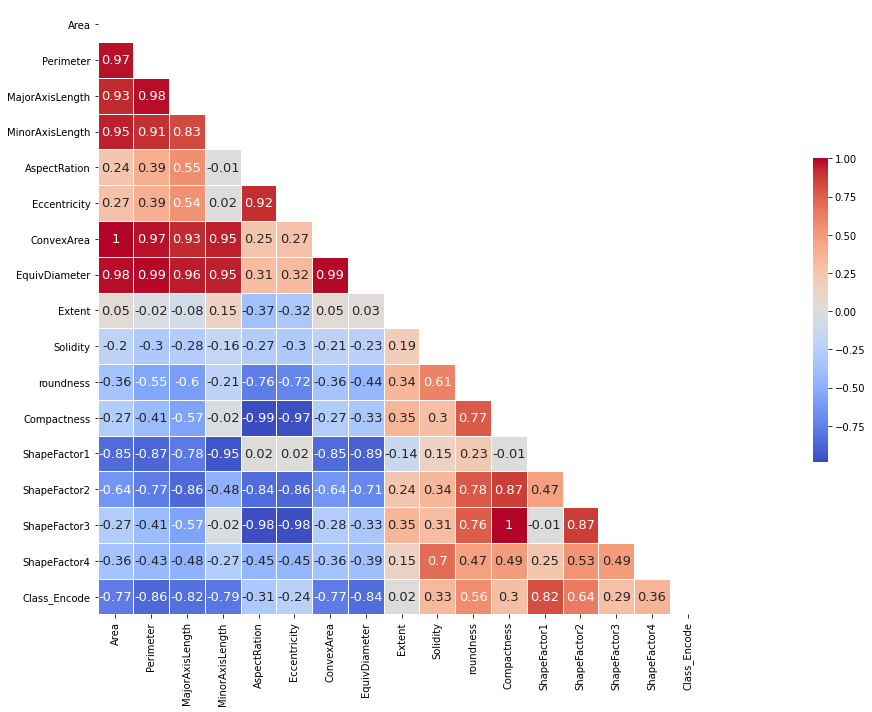

In [15]:
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(30, 10))


# Draw the heatmap
sns.heatmap(corr, mask=mask,cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,annot_kws={'size':13})

plt.tight_layout()

Now that we can easily understand our correlation values, we can understand which data values are important to us.

In [16]:
OD.drop(["Area", "Perimeter", "MajorAxisLength","MinorAxisLength","EquivDiameter","ConvexArea","Eccentricity",
         "AspectRation"], axis=1, inplace=True)

In [17]:
OD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Extent        13543 non-null  float64
 1   Solidity      13543 non-null  float64
 2   roundness     13543 non-null  float64
 3   Compactness   13543 non-null  float64
 4   ShapeFactor1  13543 non-null  float64
 5   ShapeFactor2  13543 non-null  float64
 6   ShapeFactor3  13543 non-null  float64
 7   ShapeFactor4  13543 non-null  float64
 8   Class_Encode  13543 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


We discard unnecessary lines from the data set that we think would be to the detriment of the model. When we look at the information of the data set, we see that the number of rows and columns at the beginning has decreased. This is because we get rid of the noise before we put our data set into the model.

## Feature Outliers
We will look at the outliers of the features remaining in the data set and replace them with median. The purpose of doing this is that the outliers cause performance degradation in the model that works with a normalized data set. When we look at the features below, we see that there are also outliers except for "ShapeFactor2".

### Extent

<AxesSubplot:>

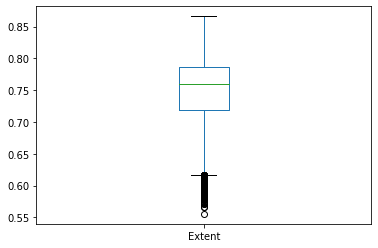

In [18]:
OD["Extent"].plot(kind="box")

In [19]:
mean = OD['Extent'].mean()
median = OD['Extent'].median()
std = OD['Extent'].std()
max = mean + (3 * std)
min =  mean - (3 * std)
OD.loc[OD.Extent < min, 'Extent'] = np.nan
OD.fillna(median,inplace=True)

### Solidity

<AxesSubplot:>

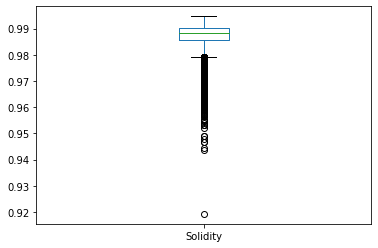

In [20]:
OD["Solidity"].plot(kind="box")

In [21]:
mean = OD['Solidity'].mean()
median = OD['Solidity'].median()
std = OD['Solidity'].std()
max = mean + (3 * std)
min =  mean - (3 * std)
OD.loc[OD.Solidity < min, 'Solidity'] = np.nan
OD.fillna(median,inplace=True)

### roundness

<AxesSubplot:>

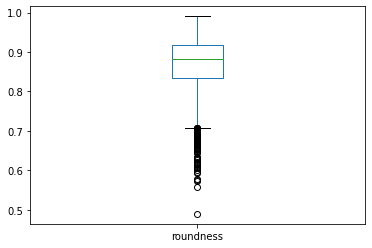

In [22]:
OD["roundness"].plot(kind="box")

In [23]:
mean = OD['roundness'].mean()
median = OD['roundness'].median()
std = OD['roundness'].std()
max = mean + (3 * std)
min =  mean - (3 * std)
OD.loc[OD.roundness < min, 'roundness'] = np.nan
OD.fillna(median,inplace=True)

In [24]:
mean = OD['roundness'].mean()
median = OD['roundness'].median()
std = OD['roundness'].std()
max = mean + (3 * std)
min =  mean - (3 * std)
OD.loc[OD.roundness >max, 'roundness'] = np.nan
OD.fillna(median,inplace=True)

### Compactness

<AxesSubplot:>

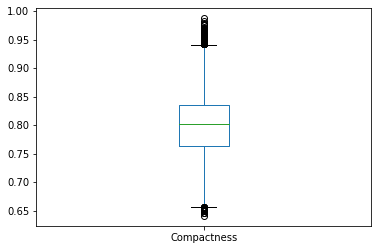

In [25]:
OD["Compactness"].plot(kind="box")

In [26]:
mean = OD['Compactness'].mean()
median = OD['Compactness'].median()
std = OD['Compactness'].std()
max = mean + (3 * std)
min =  mean - (3 * std)
OD.loc[OD.Compactness < min, 'Compactness'] = np.nan
OD.fillna(median,inplace=True)

In [27]:
mean = OD['Compactness'].mean()
median = OD['Compactness'].median()
std = OD['Compactness'].std()
max = mean + (3 * std)
min =  mean - (3 * std)
OD.loc[OD.Compactness > max, 'Compactness'] = np.nan
OD.fillna(median,inplace=True)

### ShapeFactor1

<AxesSubplot:>

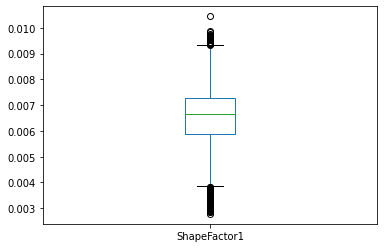

In [28]:
OD["ShapeFactor1"].plot(kind="box")

In [29]:
mean = OD['ShapeFactor1'].mean()
median = OD['ShapeFactor1'].median()
std = OD['ShapeFactor1'].std()
max = mean + (3 * std)
min =  mean - (3 * std)
OD.loc[OD.ShapeFactor1 < min, 'ShapeFactor1'] = np.nan
OD.fillna(median,inplace=True)

In [30]:
mean = OD['ShapeFactor1'].mean()
median = OD['ShapeFactor1'].median()
std = OD['ShapeFactor1'].std()
max = mean + (3 * std)
min =  mean - (3 * std)
OD.loc[OD.ShapeFactor1 >max, 'ShapeFactor1'] = np.nan
OD.fillna(median,inplace=True)

### ShapeFactor2

<AxesSubplot:>

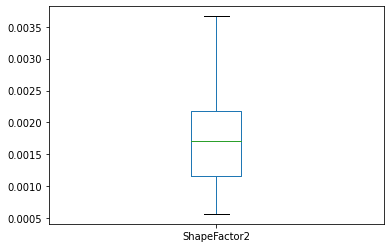

In [31]:
OD["ShapeFactor2"].plot(kind="box")

### ShapeFactor3

<AxesSubplot:>

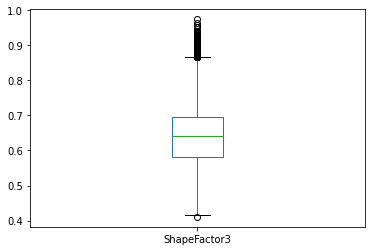

In [32]:
OD["ShapeFactor3"].plot(kind="box")

In [33]:
mean = OD['ShapeFactor3'].mean()
median = OD['ShapeFactor3'].median()
std = OD['ShapeFactor3'].std()
max = mean + (3 * std)
min =  mean - (3 * std)
OD.loc[OD.ShapeFactor3 > max, 'ShapeFactor3'] = np.nan
OD.fillna(median,inplace=True)

In [34]:
mean = OD['ShapeFactor3'].mean()
median = OD['ShapeFactor3'].median()
std = OD['ShapeFactor3'].std()
max = mean + (3 * std)
min =  mean - (3 * std)
OD.loc[OD.ShapeFactor3 <min, 'ShapeFactor3'] = np.nan
OD.fillna(median,inplace=True)

### ShapeFactor4

<AxesSubplot:>

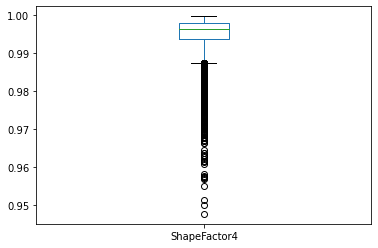

In [35]:
OD["ShapeFactor4"].plot(kind="box")

In [36]:
mean = OD['ShapeFactor4'].mean()
median = OD['ShapeFactor4'].median()
std = OD['ShapeFactor4'].std()
max = mean + (3 * std)
min =  mean - (3 * std)
OD.loc[OD.ShapeFactor4 < min, 'ShapeFactor4'] = np.nan
OD.fillna(median,inplace=True)

## Modeling for Clustering <a class="anchor" id="clusteringmodel"></a>

### Clustering with original data

In [37]:
OD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Extent        13543 non-null  float64
 1   Solidity      13543 non-null  float64
 2   roundness     13543 non-null  float64
 3   Compactness   13543 non-null  float64
 4   ShapeFactor1  13543 non-null  float64
 5   ShapeFactor2  13543 non-null  float64
 6   ShapeFactor3  13543 non-null  float64
 7   ShapeFactor4  13543 non-null  float64
 8   Class_Encode  13543 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [38]:
y= OD["Class_Encode"]
ODcls1 = OD.iloc[:,:8]

We divide our data set into two as feature and label.

In [39]:
kmeans = KMeans(init='k-means++',n_clusters=7)
y_kmeans = kmeans.fit_predict(ODcls1)

We train our original dataset with the k-means++ algorithm. We give the clustering number as 7.

In [40]:
centers = kmeans.cluster_centers_
print(centers)

[[0.77350755 0.99028994 0.94707383 0.90136297 0.00638283 0.00260187
  0.81292442 0.99830289]
 [0.74831194 0.98186808 0.78334755 0.81046835 0.00544017 0.00145439
  0.65752224 0.99561519]
 [0.77559015 0.98650606 0.79776671 0.70219075 0.00671042 0.00100301
  0.49356531 0.99301788]
 [0.76494628 0.98863416 0.91097834 0.8283512  0.00708761 0.00205645
  0.68592162 0.99676348]
 [0.70840527 0.98728397 0.87632126 0.78891665 0.00676761 0.00162401
  0.62269532 0.99513676]
 [0.6598502  0.98592397 0.79848591 0.70884537 0.00676411 0.00105282
  0.50304665 0.99326561]
 [0.78448123 0.98693276 0.86137513 0.77027412 0.00598454 0.00130157
  0.59362673 0.99346014]]


The center of our clusters seems to be above.

### Clustering with normalized data

In [41]:
def MScaler(ODcls1):
    scaler = MinMaxScaler()
    ODcls_ND = pd.DataFrame(scaler.fit_transform(ODcls1), columns=ODcls1.columns)
    return ODcls_ND

In this function I normalized my data using MinMaxScaler. Because we use the MinMaxScaler method to normalize values and reduce dominance. MinMax Scaling is a situation in which data takes values between 0 and 1.

In [42]:
ODcls2 = OD.iloc[:,:8]

We separate our data set to be features only.

In [43]:
ODcls_ND = MScaler(ODcls2)

We normalize our data set.

In [44]:
kmeans_ND = KMeans(init='k-means++',n_clusters=7)
y_kmeans_ND = kmeans_ND.fit_predict(ODcls_ND)

We train our normalized dataset with the k-means++ algorithm. We give the clustering number as 7.

In [45]:
centers_ND = kmeans_ND.cluster_centers_
print(centers_ND)

[[0.41832128 0.68602453 0.63790291 0.45464225 0.58258406 0.38372369
  0.42244003 0.78278665]
 [0.39515828 0.64910361 0.33763329 0.1734115  0.56194066 0.15008354
  0.15104164 0.69030095]
 [0.64588975 0.80613014 0.85938544 0.76024509 0.48077902 0.6552716
  0.75527    0.92388692]
 [0.54561781 0.39742461 0.34224526 0.488385   0.33547816 0.27967097
  0.45899175 0.79415677]
 [0.68101946 0.72249457 0.55152637 0.38471975 0.32506754 0.18936055
  0.35254743 0.67881039]
 [0.63851232 0.72583219 0.73076906 0.53138474 0.63572542 0.49553988
  0.50267804 0.84972471]
 [0.54469316 0.38850782 0.46603816 0.3328921  0.38011091 0.18584107
  0.30169429 0.31381575]]


The center of our clusters seems to be above.

## Clustering results<a class="anchor" id="clustering"></a>

### Clustering results with original data

In [46]:
ODcls1 = np.array(ODcls1)

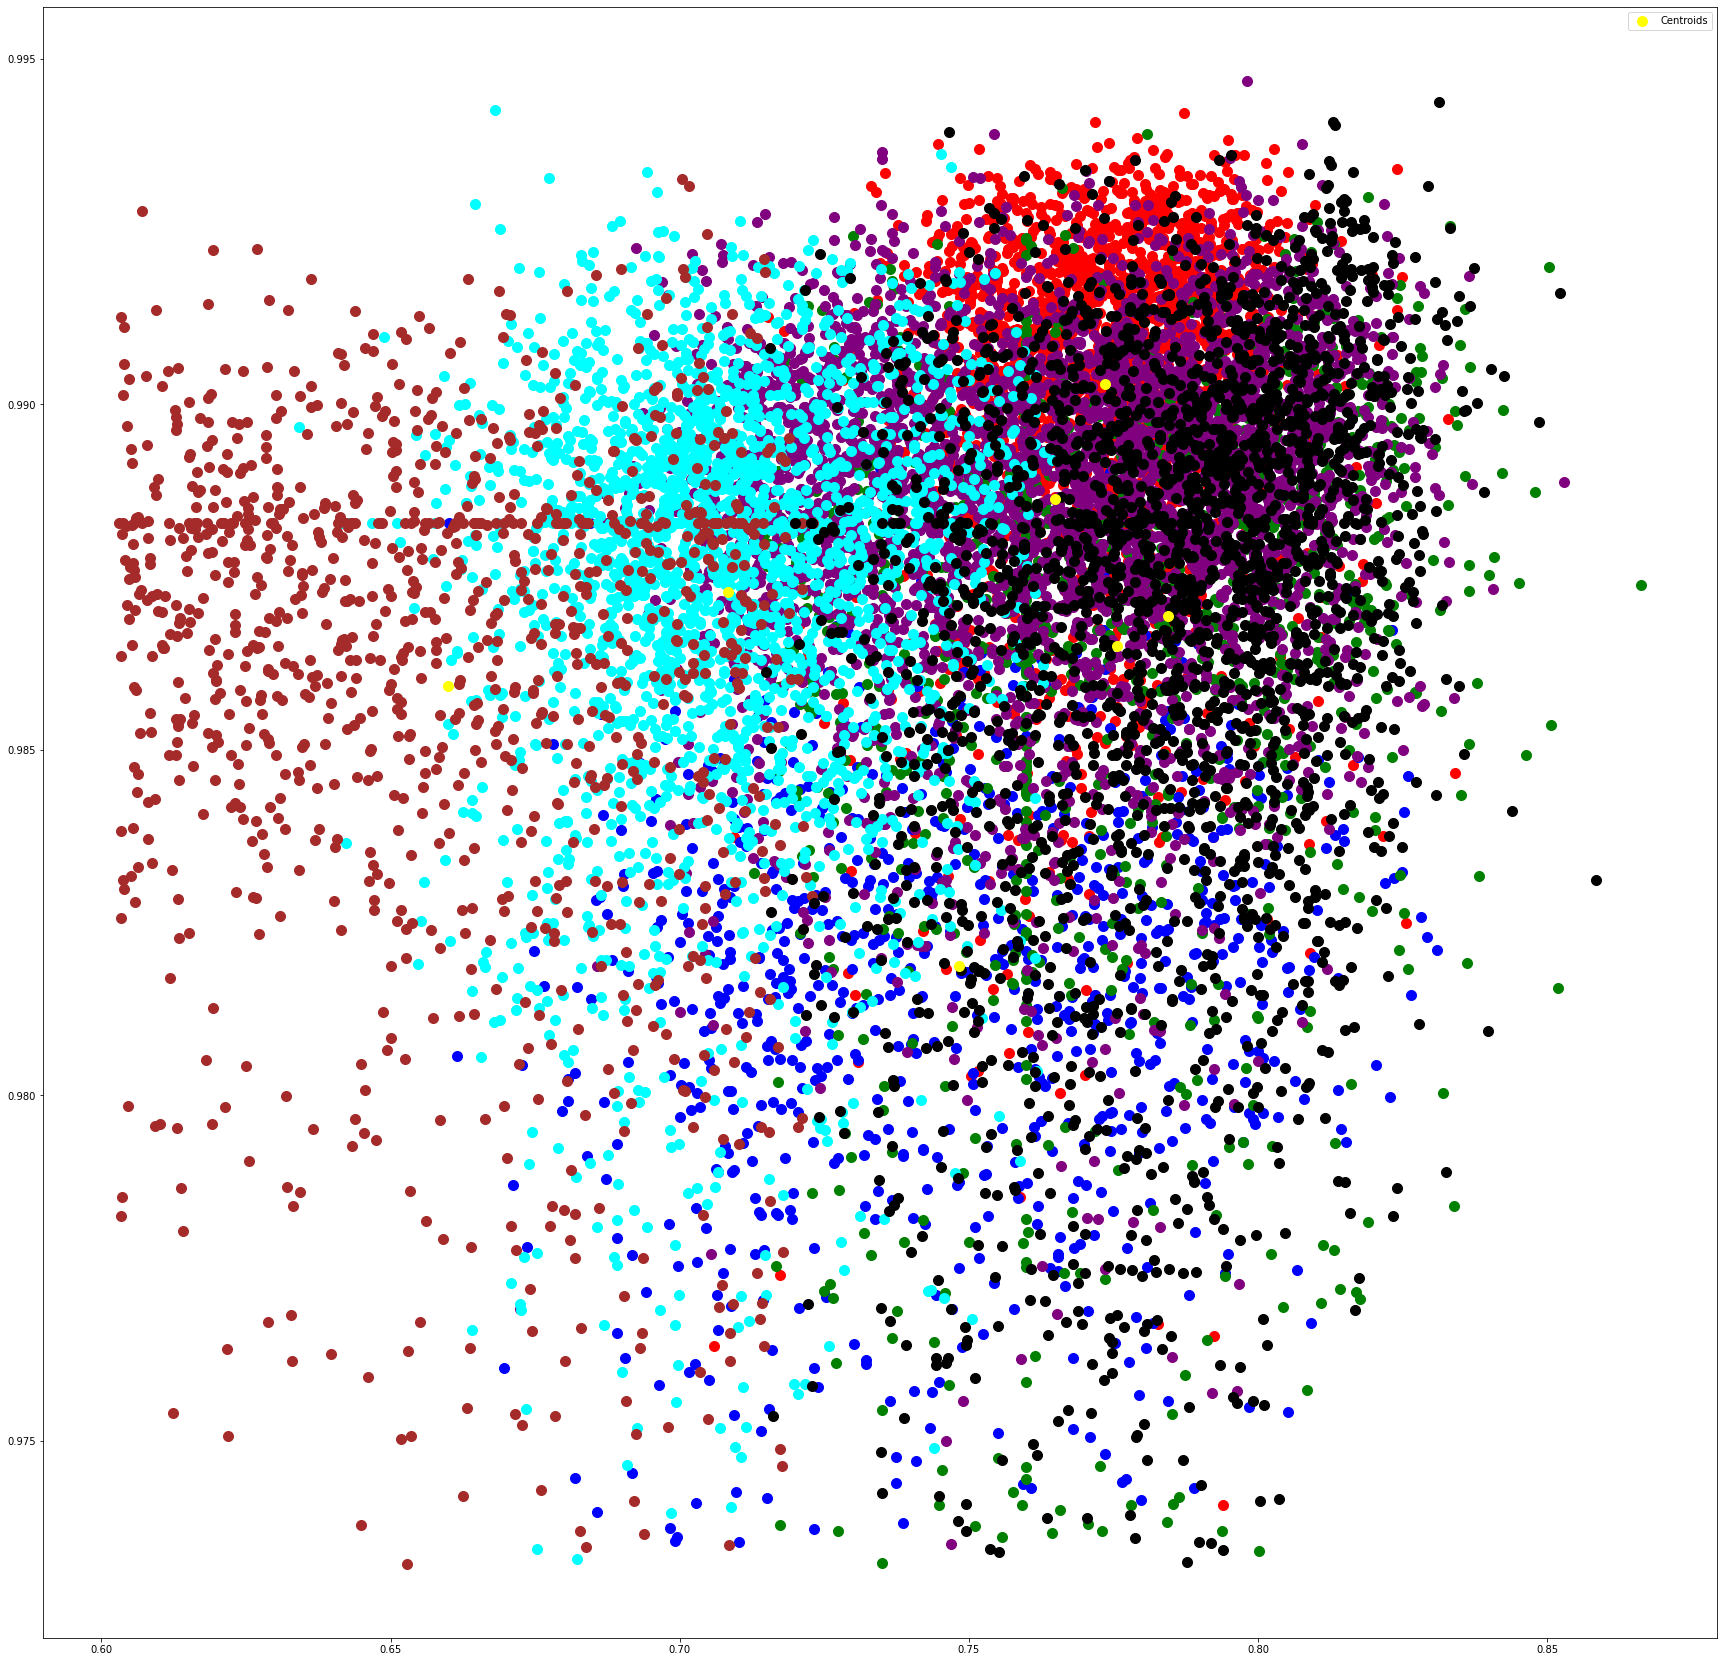

In [47]:
plt.subplots(figsize=(30, 30))
plt.scatter(ODcls1[y_kmeans == 0, 0], ODcls1[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(ODcls1[y_kmeans == 1, 0], ODcls1[y_kmeans == 1, 1], s = 100, c = 'blue')
plt.scatter(ODcls1[y_kmeans == 2, 0], ODcls1[y_kmeans == 2, 1], s = 100, c = 'green')
plt.scatter(ODcls1[y_kmeans == 3, 0], ODcls1[y_kmeans == 3, 1], s = 100, c = 'purple')
plt.scatter(ODcls1[y_kmeans == 4, 0], ODcls1[y_kmeans == 4, 1], s = 100, c = 'cyan')
plt.scatter(ODcls1[y_kmeans == 5, 0], ODcls1[y_kmeans == 5, 1], s = 100, c = 'brown')
plt.scatter(ODcls1[y_kmeans == 6, 0], ODcls1[y_kmeans == 6, 1], s = 100, c = 'black')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Text(0.5, 1.0, 'Predicted')

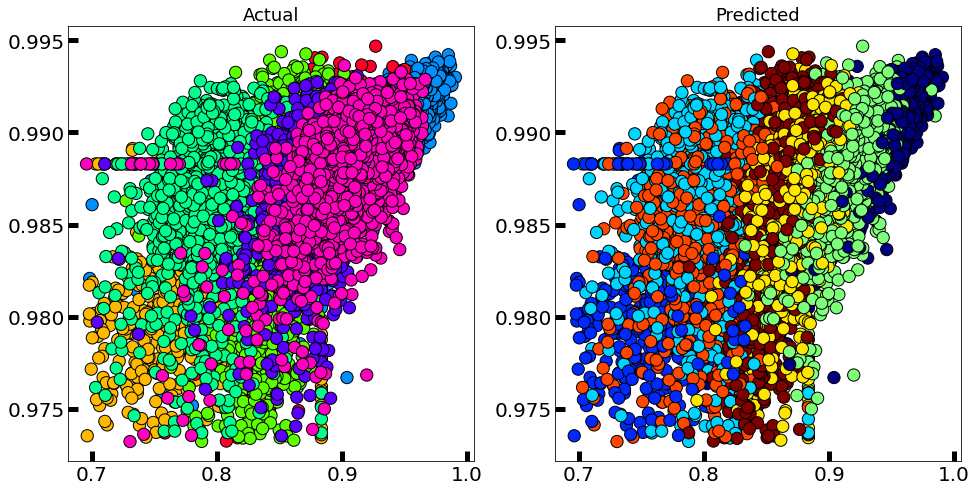

In [48]:
pred_labels = kmeans.labels_

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(ODcls1[:, 2], ODcls1[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(ODcls1[:, 2], ODcls1[:, 1], c=pred_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

Text(0.5, 1.0, 'Predicted')

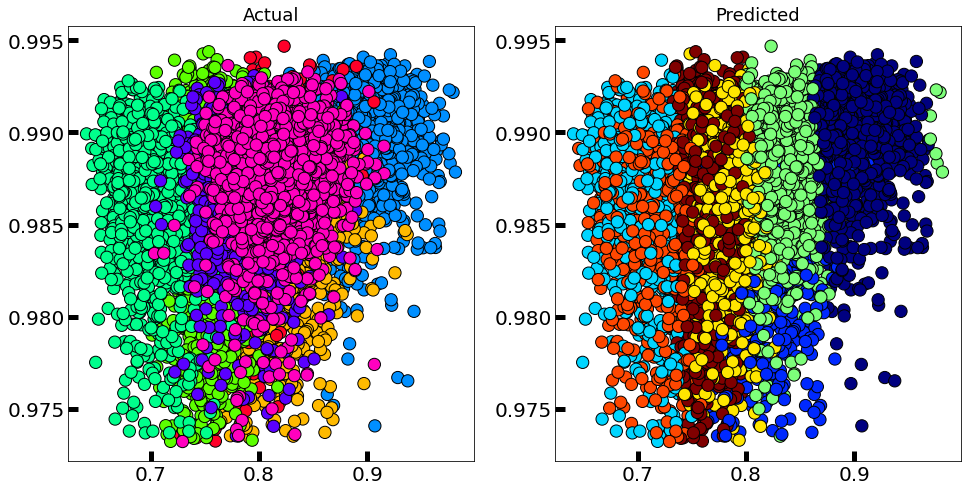

In [49]:
pred_labels = kmeans.labels_

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(ODcls1[:, 3], ODcls1[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(ODcls1[:, 3], ODcls1[:, 1], c=pred_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

Text(0.5, 1.0, 'Predicted')

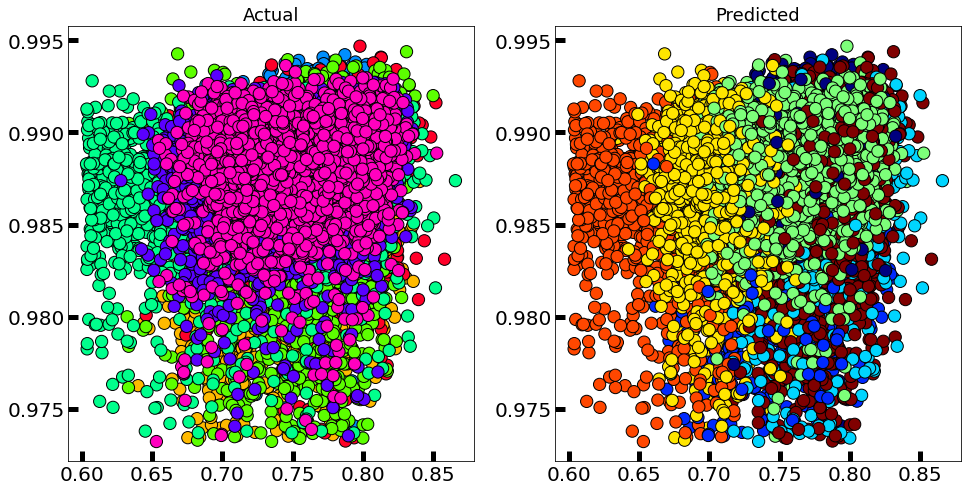

In [50]:
pred_labels = kmeans.labels_

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(ODcls1[:, 0], ODcls1[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(ODcls1[:, 0], ODcls1[:, 1], c=pred_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

### Clustering results with normalized data

In [51]:
ODcls_ND = np.array(ODcls_ND)

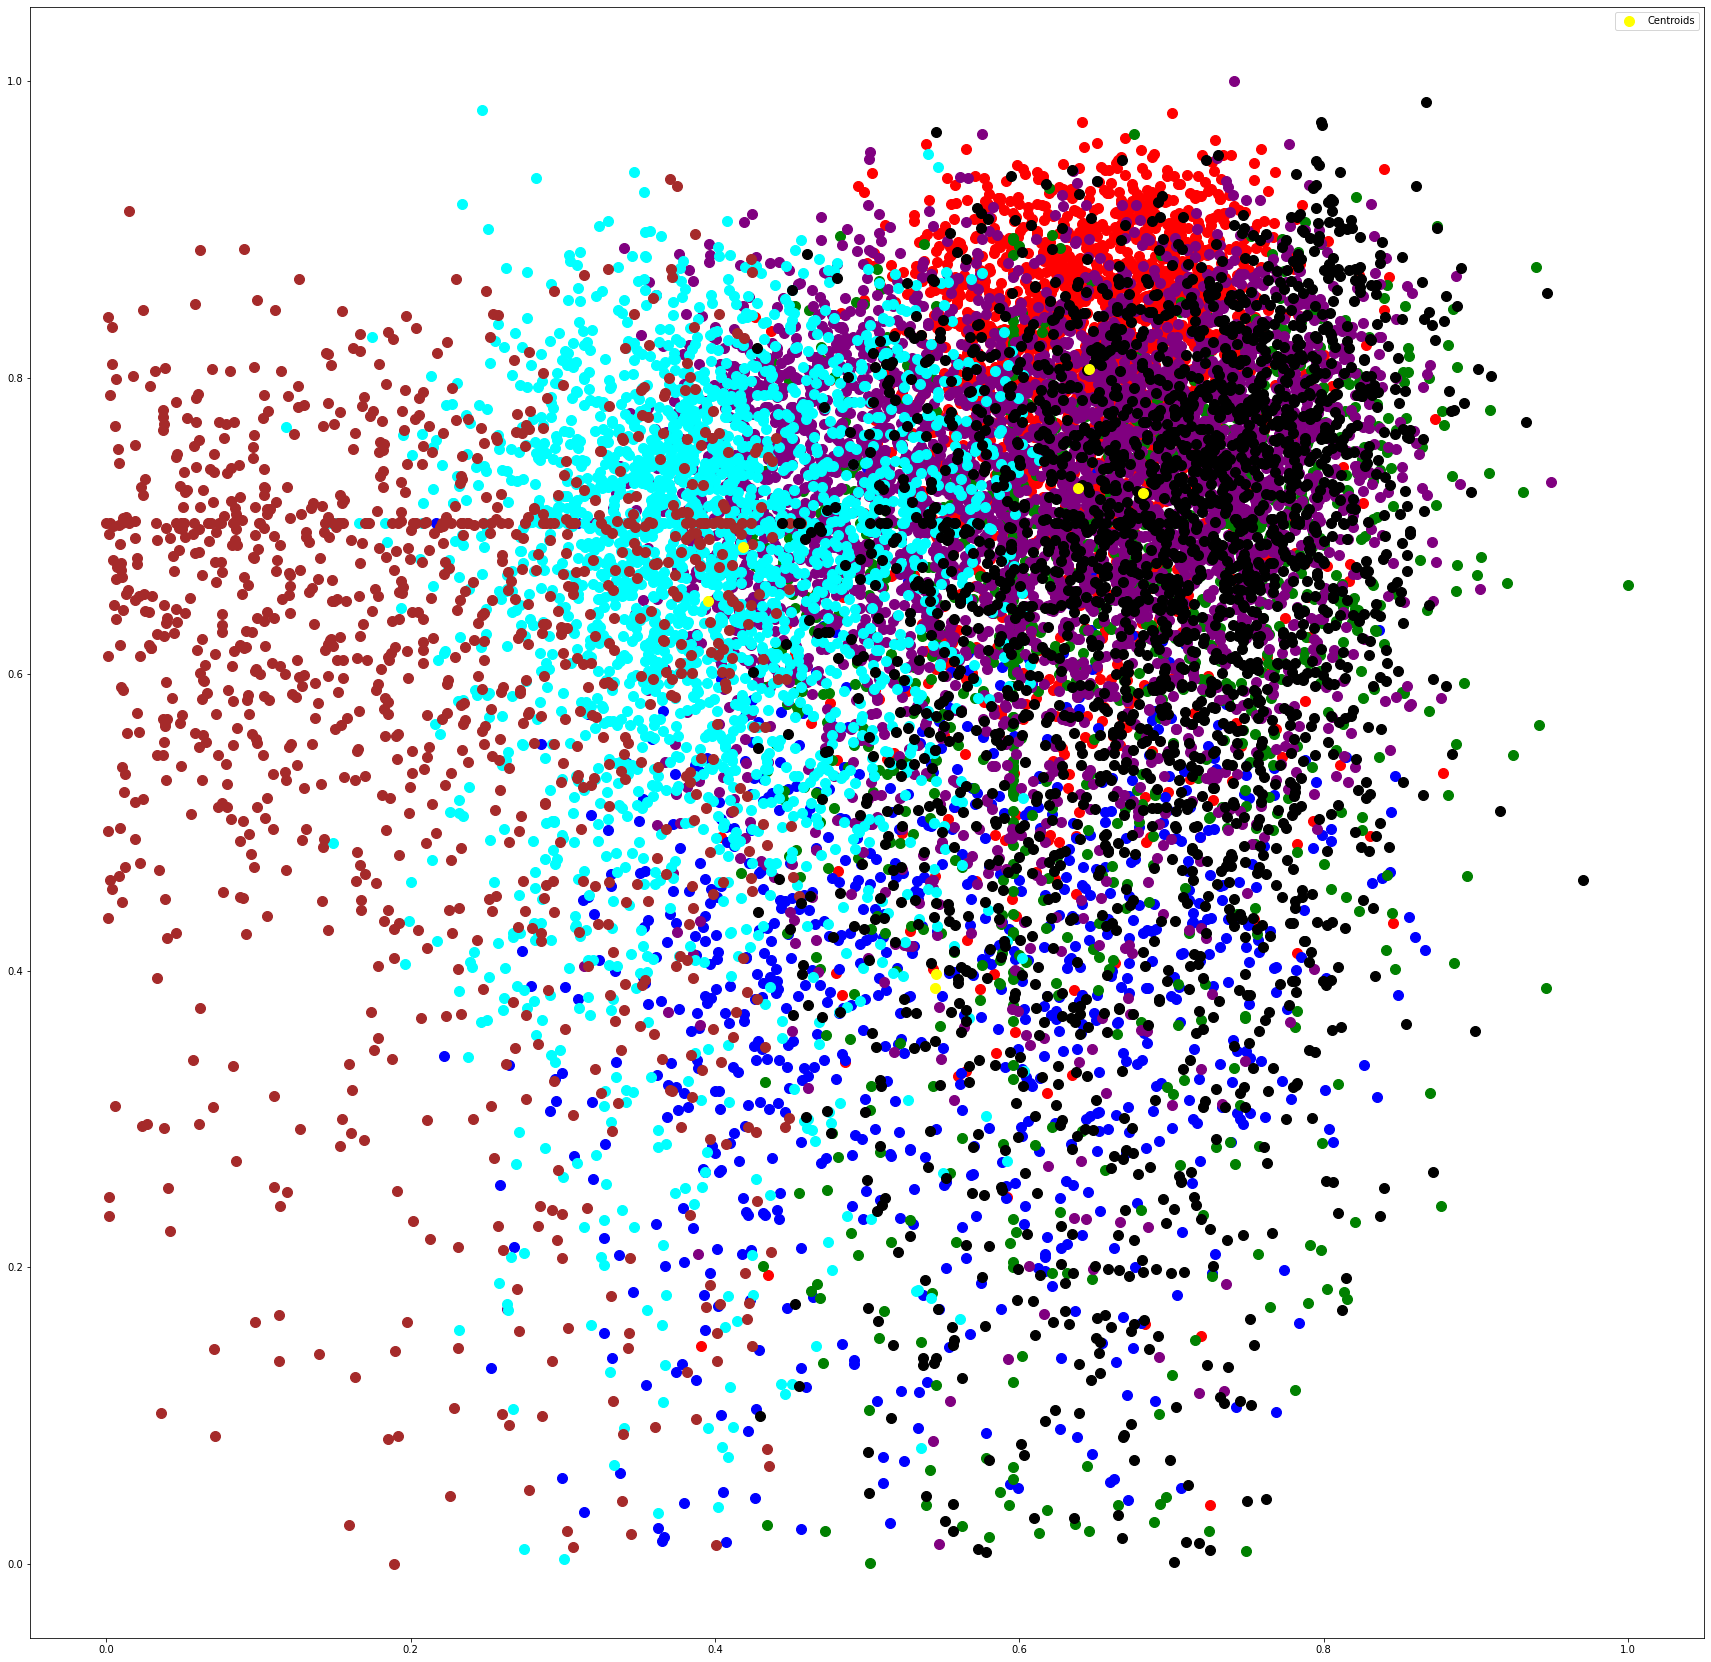

In [52]:
plt.subplots(figsize=(30, 30))
plt.scatter(ODcls_ND[y_kmeans == 0, 0], ODcls_ND[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(ODcls_ND[y_kmeans == 1, 0], ODcls_ND[y_kmeans == 1, 1], s = 100, c = 'blue')
plt.scatter(ODcls_ND[y_kmeans == 2, 0], ODcls_ND[y_kmeans == 2, 1], s = 100, c = 'green')
plt.scatter(ODcls_ND[y_kmeans == 3, 0], ODcls_ND[y_kmeans == 3, 1], s = 100, c = 'purple')
plt.scatter(ODcls_ND[y_kmeans == 4, 0], ODcls_ND[y_kmeans == 4, 1], s = 100, c = 'cyan')
plt.scatter(ODcls_ND[y_kmeans == 5, 0], ODcls_ND[y_kmeans == 5, 1], s = 100, c = 'brown')
plt.scatter(ODcls_ND[y_kmeans == 6, 0], ODcls_ND[y_kmeans == 6, 1], s = 100, c = 'black')

#Plotting the centroids of the clusters
plt.scatter(kmeans_ND.cluster_centers_[:, 0], kmeans_ND.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Text(0.5, 1.0, 'Predicted')

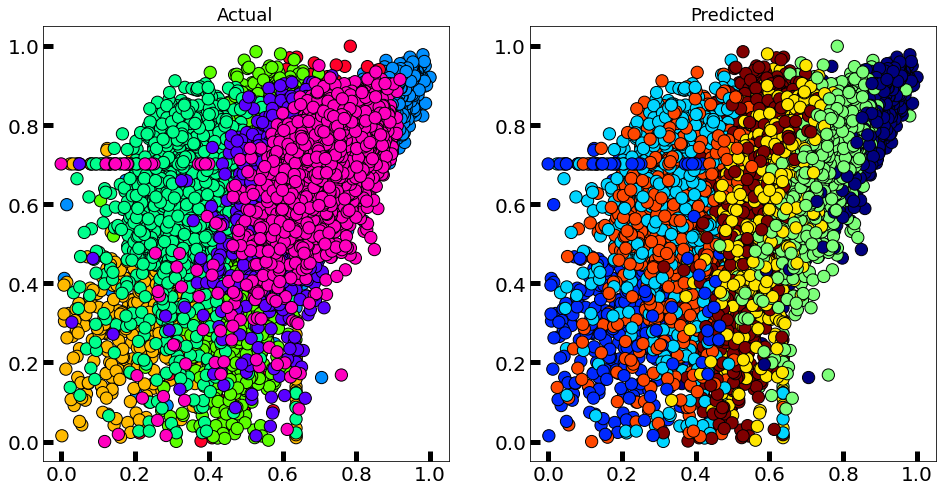

In [53]:
pred_labels_ND = kmeans_ND.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(ODcls_ND[:, 2], ODcls_ND[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(ODcls_ND[:, 2], ODcls_ND[:, 1], c=pred_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

Text(0.5, 1.0, 'Predicted')

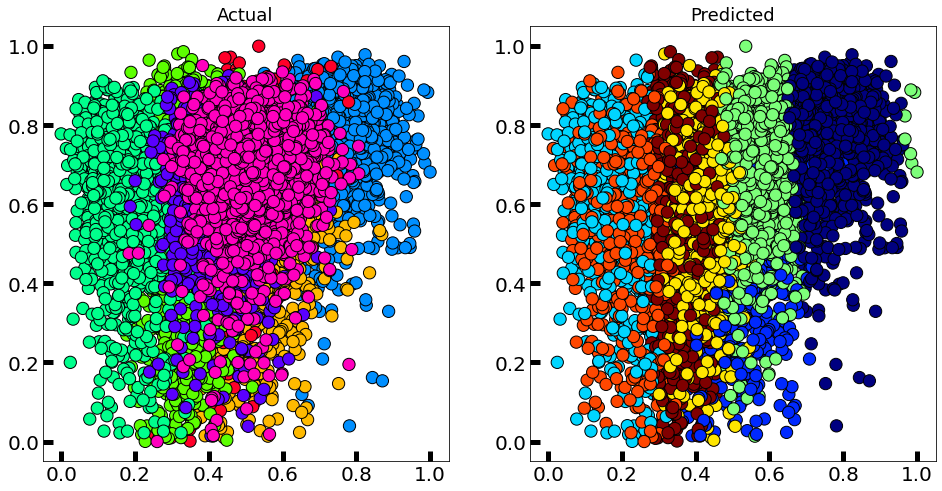

In [54]:
pred_labels_ND = kmeans_ND.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(ODcls_ND[:, 3], ODcls_ND[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(ODcls_ND[:, 3], ODcls_ND[:, 1], c=pred_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

Text(0.5, 1.0, 'Predicted')

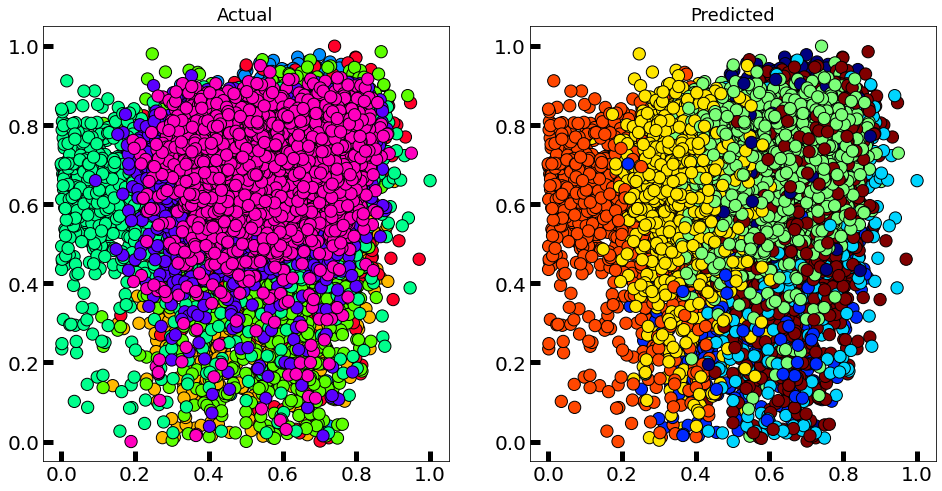

In [55]:
pred_labels_ND = kmeans_ND.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(ODcls_ND[:, 0], ODcls_ND[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(ODcls_ND[:, 0], ODcls_ND[:, 1], c=pred_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

### Evaluation with original data

In [56]:
ODcls["Class"]=y
ODcls["Cluster"]=pred_labels

<ipython-input-56-1bc5d6f7c2c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ODcls["Class"]=y
<ipython-input-56-1bc5d6f7c2c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ODcls["Cluster"]=pred_labels


In [57]:
ODcls["Class"].value_counts()

7    3546
6    2636
5    2027
4    1860
3    1630
2    1322
1     522
Name: Class, dtype: int64

In [58]:
ODcls["Cluster"].value_counts()

3    3800
6    2441
4    2278
0    1956
2    1144
5    1099
1     825
Name: Cluster, dtype: int64

Above, you can see the label data we estimate and the actual label data.

In [59]:
metrics.silhouette_score(ODcls1,pred_labels)

0.36478379749039486

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.

In [60]:
metrics.rand_score(y, pred_labels)

0.8112115320654485

The Rand score in statistics, and in particular in data clustering, is a measure of the similarity between two data clusterings. A form of the Rand index may be defined that is adjusted for the chance grouping of elements, this is the adjusted Rand index. From a mathematical standpoint, Rand index is related to the accuracy, but is applicable even when class labels are not used.

### Evaluation with normalized data

In [61]:
ODcls["Cluster_ND"]=pred_labels_ND

<ipython-input-61-6b00b348b5f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ODcls["Cluster_ND"]=pred_labels_ND


In [62]:
ODcls["Class"].value_counts()

7    3546
6    2636
5    2027
4    1860
3    1630
2    1322
1     522
Name: Class, dtype: int64

In [63]:
ODcls["Cluster_ND"].value_counts()

5    3534
0    2205
2    2016
4    1896
1    1666
6    1119
3    1107
Name: Cluster_ND, dtype: int64

Above, you can see the label data we estimate and the actual label data.

In [64]:
metrics.silhouette_score(ODcls_ND,pred_labels_ND)

0.2515782101961021

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.

In [65]:
metrics.rand_score(ODcls['Class_Encode'], pred_labels_ND)

0.8491605306292708

The Rand score in statistics, and in particular in data clustering, is a measure of the similarity between two data clusterings. A form of the Rand index may be defined that is adjusted for the chance grouping of elements, this is the adjusted Rand index. From a mathematical standpoint, Rand index is related to the accuracy, but is applicable even when class labels are not used.


## Modeling for Classification <a class="anchor" id="classificationmodel"></a>

I decided to use the Random Forest Trees algorithm. Because the Random Forest Trees algorithm is a group learning method for both classification and regression problems. Separates data and creates multiple decision trees. The result is a combination of these decision trees. Also the reason I chose Random Forest Trees is because of a group method. Therefore, you are less likely to face an overfitting problem.

In [66]:
def split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
    return X_train, X_test, y_train, y_test

In this function, I split my data with a 20% test - 80% training rate.

In [67]:
def MMScaler(X_train,X_test):
    scaler = MinMaxScaler()
    X_ND_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_ND_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    return X_ND_train, X_ND_test

In this function I normalized my data using MinMaxScaler. Because we use the MinMaxScaler method to normalize values and reduce dominance. MinMax Scaling is a situation in which data takes values between 0 and 1.

In [68]:
def classificationPredict(X_train,y_train):
    nfolds = 5
    cV = StratifiedKFold(n_splits=nfolds, shuffle=True)
    param_grid = {
        'n_estimators' : [5,10,25,50,100],
        'criterion' : ['entropy','gini'],
        'max_features' : [0.2,'sqrt',1., None, 'auto'],
        'class_weight' : ['balanced', 'balanced_subsample', None], 
        }
    
    clasf = RandomForestClassifier()
    cvclasf = GridSearchCV(clasf, param_grid, verbose=0,refit=True,cv=cV, scoring='f1_weighted', n_jobs=4)
    
    # Fit GridSearch
    cvclasf.fit(X_train,y_train)
    # Take the best classifier
    bclasf = cvclasf.best_estimator_
    # Print out best parameters chosen for given model.
    print("%d-fold best CV params: %s" % (nfolds,cvclasf.best_params_))
    
    return bclasf

I used random forest trees in this function. And I trained this model with the training data set (X_train, y_train). We used Grid Search with 5-fold cross validation to select the parameters that give the best results. 5-fold cross validation is a verification method that divides the data into 5 equal parts and uses them as test data for each part and the other as training data. Grid search is a brute force method to test the model for each given parameter to get the best result.

In [69]:
def classModel(X_train, y_train):
    clasf = classificationPredict(X_train, y_train)
    return clasf

This function trains our model with the train set.

### Classification with original data

In [70]:
X= OD.drop(columns=["Class_Encode"])
y= OD.loc[:,"Class_Encode"]

Here we separate our original data set as dependent value and independent value.

In [71]:
X_train, X_test, y_train, y_test = split_data(X, y)

We divide dependent values and independent values into two sets as train and test. We will use the train set to train the model. We will also use the test set for the accuracy of the model.

In [72]:
clasf= classModel(X_train, y_train)

5-fold best CV params: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}


We train our model with the train set obtained from our original data set. As you can see above, GridSearchCV shows us the best parameters to use in our model.

### Classification with normalized data

In [73]:
X_train_ND, X_test_ND, y_train_ND, y_test_ND = split_data(X, y)

Here we separate our original data set into dependent value and independent value. But this time, we're putting new values differently than the base because we're going to normalize this data set.

In [74]:
X_train_ND, X_test_ND = MMScaler(X_train_ND, X_test_ND)

We normalize the X_train_ND and X_test_ND data from the data set that we separate as train and test.

In [75]:
clasf_ND = classModel(X_train_ND, y_train_ND)

5-fold best CV params: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}


We use the normalized X_train_ND and y_test_ND to train our model. As you can see above, GridSearchCV shows us the best parameters to use in our model.

## Evaluation<a class="anchor" id="evaluation"></a>

### Evaluation with original data

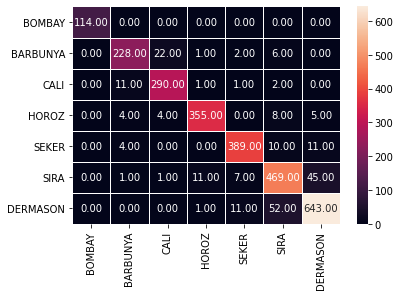

In [76]:
y_pred = clasf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    data=cm,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    xticklabels=["BOMBAY", "BARBUNYA","CALI","HOROZ","SEKER","SIRA","DERMASON"],
    yticklabels=["BOMBAY", "BARBUNYA","CALI","HOROZ","SEKER","SIRA","DERMASON"]
)

fig = plt.gcf()

plt.show()

We now give test data to the model that we trained from our original data set, and we look at which one is measured correctly and which is wrong. We use the confusion matrix method for this and the heatmap method to visualize it.

In [77]:
print("Test accuracy of the model %.3f"% clasf.score(X_test, y_test))

print(classification_report(y_test, y_pred))

Test accuracy of the model 0.918
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       114
           2       0.92      0.88      0.90       259
           3       0.91      0.95      0.93       305
           4       0.96      0.94      0.95       376
           5       0.95      0.94      0.94       414
           6       0.86      0.88      0.87       534
           7       0.91      0.91      0.91       707

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



Above, we see the results obtained with the test data of the model created from the original data set. When we look at the accuracy rate, we see that we got a value of 92%. We can also see other test methods we use for accuracy.

### Evaluation with normalized data

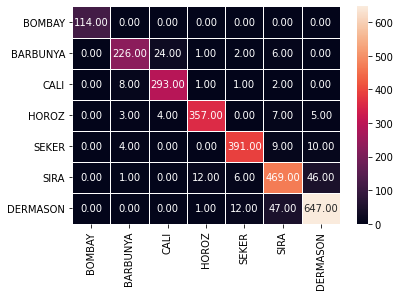

In [78]:
y_pred_ND = clasf_ND.predict(X_test_ND)
cm = confusion_matrix(y_test_ND, y_pred_ND)
sns.heatmap(
    data=cm,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    xticklabels=["BOMBAY", "BARBUNYA","CALI","HOROZ","SEKER","SIRA","DERMASON"],
    yticklabels=["BOMBAY", "BARBUNYA","CALI","HOROZ","SEKER","SIRA","DERMASON"]
)

fig = plt.gcf()

plt.show()

We now give test data to the model we trained from our normalized data set, and we look at which one is measured correctly and which is wrong. We use the confusion matrix method for this and the heatmap method to visualize it.

In [79]:
print("Test accuracy of the model %.3f"% clasf_ND.score(X_test_ND, y_test_ND))

print(classification_report(y_test_ND, y_pred_ND))

Test accuracy of the model 0.922
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       114
           2       0.93      0.87      0.90       259
           3       0.91      0.96      0.94       305
           4       0.96      0.95      0.95       376
           5       0.95      0.94      0.95       414
           6       0.87      0.88      0.87       534
           7       0.91      0.92      0.91       707

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



We see the results obtained with the test data of the model created from the normalized data set above. When we look at the accuracy rate, we see that we got a value of 92%. We can also see other test methods we use for accuracy.

## References<a class="anchor" id="references"></a>

1. https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42

2. https://stackoverflow.com/questions/45386955/python-replacing-outliers-values-with-median-values

3. https://github.com/ahmetalkilinc/DataScienceTutorials

4. http://yunus.hacettepe.edu.tr/~akal/BBM467/ (Lecture Notes)

5. https://learn.datacamp.com

6. https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

7. https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv


**Disclaimer!** <font color='grey'>This notebook was prepared by Mustafa Kollu as an assigment for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>